In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
!pip install plotly
!pip install jupyter-dash
import warnings
warnings.filterwarnings('ignore')


     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 1.0MB 41.0MB/s 
     |████████████████████████████████| 3.5MB 34.9MB/s 
     |████████████████████████████████| 92kB 13.2MB/s 
     |████████████████████████████████| 1.8MB 34.9MB/s 
     |████████████████████████████████| 358kB 45.9MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=e59c0e72461ce2c93b53bc2fc6998bb7846987a692edb1be5f91e19ddd31f394
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=e556afea12406f59249dcb7ff3f06b16d76effb7d03dcfbb8cb1807015942591
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540993 sha256=6e4e9a8114ab67458c292

In [ ]:
# importing plotyly for interactive visualizations
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import math

In [ ]:
# loading the data from google drive
traindata = pd.read_csv("/content/drive/MyDrive/train_GzS76OK/train.csv")
testdata = pd.read_csv("/content/drive/MyDrive/train_GzS76OK/test_QoiMO9B.csv")
mealinfo = pd.read_csv("/content/drive/MyDrive/train_GzS76OK/meal_info.csv")
fulfillmentCenterData = pd.read_csv("/content/drive/MyDrive/train_GzS76OK/fulfilment_center_info.csv")
from sklearn.model_selection import train_test_split

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


Here we can see that there is no null data


In [ ]:
traindata.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
testdata.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:

mealinfo.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
fulfillmentCenterData.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
# merging the data to get the full dataset
traindata = pd.merge(traindata,fulfillmentCenterData, on = 'center_id')
testdata = pd.merge(testdata,fulfillmentCenterData, on = 'center_id')

traindata = pd.merge(traindata,mealinfo, on = 'meal_id')
testdata = pd.merge(testdata,mealinfo, on = 'meal_id')

In [ ]:
traindata.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [ ]:
testdata.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [ ]:
traindata.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [ ]:
#sorting the data by weeks as out problem statment is for forcasting
traindata.sort_values(by = ['week'], inplace= True)
traindata.reset_index(inplace= True)

In [ ]:
traindata.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
2,299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
3,299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
4,31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai


In [ ]:
traindata.columns

Index(['index', 'id', 'week', 'center_id', 'meal_id', 'checkout_price',
       'base_price', 'emailer_for_promotion', 'homepage_featured',
       'num_orders', 'city_code', 'region_code', 'center_type', 'op_area',
       'category', 'cuisine'],
      dtype='object')

In [ ]:
# splitting the data set into train set and validation set
traindata , valdata = train_test_split(traindata, test_size=  0.2, shuffle = False)
traindata.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
2,299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
3,299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
4,31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai


In [ ]:
valdata.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
365238,284979,1150510,118,94,2444,727.53,728.53,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental
365239,368181,1491945,118,10,1198,188.21,224.10,0,0,784,590,56,TYPE_B,6.3,Extras,Thai
365240,243538,1489219,118,36,1558,698.43,699.43,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental
365241,246379,1443896,118,113,1558,639.23,639.23,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental
365242,381725,1175284,118,50,2760,242.53,243.53,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai


In [ ]:
valdata2 = valdata.copy()
testdata2 = testdata.copy()

In [ ]:
#checking for the presence of null data
traindata.isnull().sum()

index                    0
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [ ]:
valdata.isnull().sum()

index                    0
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [ ]:
testdata.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

## Step 1 - Knowing the data - Initial steps


In [ ]:
traindata.dtypes

index                      int64
id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [ ]:
traindata.describe()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,365238.000000,3.652380e+05,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000,365238.000000
mean,226724.299473,1.249948e+06,60.562455,82.134923,2022.893604,330.466444,352.066613,0.082108,0.110068,265.283985,601.559920,56.594812,4.082664
std,131101.362207,1.443790e+05,33.618528,45.981341,547.261050,152.866256,159.863266,0.274530,0.312975,402.990055,66.233687,17.639746,1.090405
min,0.000000,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,113396.250000,1.124769e+06,32.000000,43.000000,1558.000000,228.980000,242.560000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,226293.500000,1.249898e+06,61.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,339714.750000,1.374944e+06,90.000000,110.000000,2539.000000,445.230000,456.870000,0.000000,0.000000,325.000000,651.000000,77.000000,4.500000
max,456519.000000,1.499999e+06,118.000000,186.000000,2956.000000,738.230000,738.230000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
#exploring the target variable num_orders
traindata['num_orders'].describe()

count    365238.000000
mean        265.283985
std         402.990055
min          13.000000
25%          54.000000
50%         136.000000
75%         325.000000
max       24299.000000
Name: num_orders, dtype: float64

In [ ]:
# skewness and kurtosis
print("Skewness: %f" % traindata['num_orders'].skew())
print("Kurtosis: %f" % traindata['num_orders'].kurt())

# Since this data has a high kurtosis value so, its evident that it has alot of outliers
# alse the skewness value is positive so, the data is positively skewed

Skewness: 7.057726
Kurtosis: 127.512560


Analysing the outliers

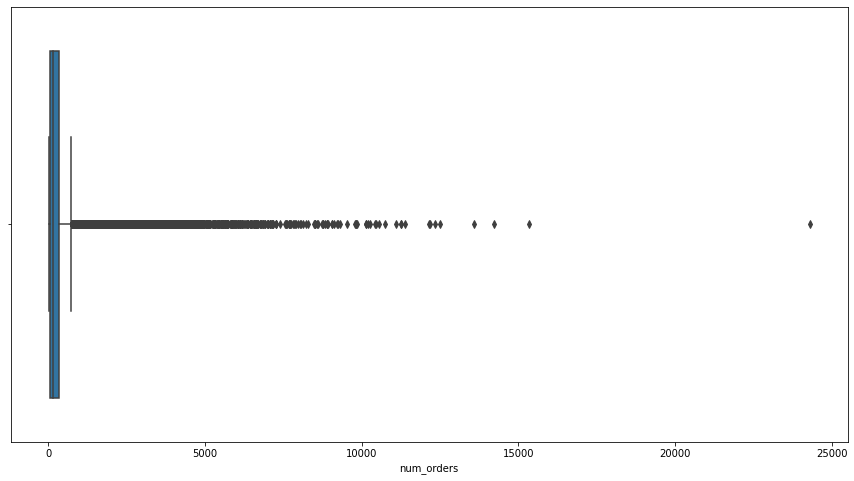

In [ ]:
dims = (15, 8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(x=traindata['num_orders'], ax = ax)

In [ ]:
# Since we can see that the amount of outlier is very high so we need to find out the exact number
data_mean, data_std = mean(traindata['num_orders']), std(traindata['num_orders'])
factor = data_std * 3
lower, upper = data_mean - factor, data_mean + factor
outliers = [x for x in traindata['num_orders'] if x < lower or x > upper]
print(len(outliers))

6027


In [ ]:
# percentage of outliers
percentageOutliers = (len(outliers)/len(traindata) * 100)
print("Percentage of outliers")
print(percentageOutliers)

Percentage of outliers
1.6501568840044025


In [ ]:
traindata.dtypes

index                      int64
id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

Dropping the ID column as it gives no insight about the data

In [ ]:
traindata.drop(labels = "id", inplace=True, axis = 1)

In [ ]:
traindata

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
2,299851,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
3,299996,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
4,31140,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365233,427387,118,17,1571,583.03,582.03,0,0,94,517,56,TYPE_A,3.2,Fish,Continental
365234,71165,118,10,1778,166.90,166.90,0,0,608,590,56,TYPE_B,6.3,Beverages,Italian
365235,321063,118,108,2304,387.03,472.39,0,0,122,579,56,TYPE_B,4.4,Desert,Indian
365236,162937,118,57,2640,282.33,281.33,0,0,67,541,77,TYPE_C,2.8,Starters,Thai


Generating new features

2 more features than are clearly observable is the discount percentage and the weekly price difference. These can significantly impact the performance of our model as discount and weekly price drops gives the customer more incentive and drive to buy a product

In [ ]:
# Discount Amount
traindata['discount_amount']=traindata['base_price']- traindata['checkout_price']
# Discount percentage
traindata['discount_percent'] = ((traindata['base_price']-traindata['checkout_price'])/traindata['base_price'])*100
# whether the person got a discount or not
traindata['discount_flag'] = [1 if x>0 else 0 for x in (traindata['base_price']-traindata['checkout_price'])]

In [ ]:
traindata.head()

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1
2,299851,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,36.83,13.091387,1
3,299996,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,2.00,0.795893,1
4,31140,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,2.00,1.472104,1


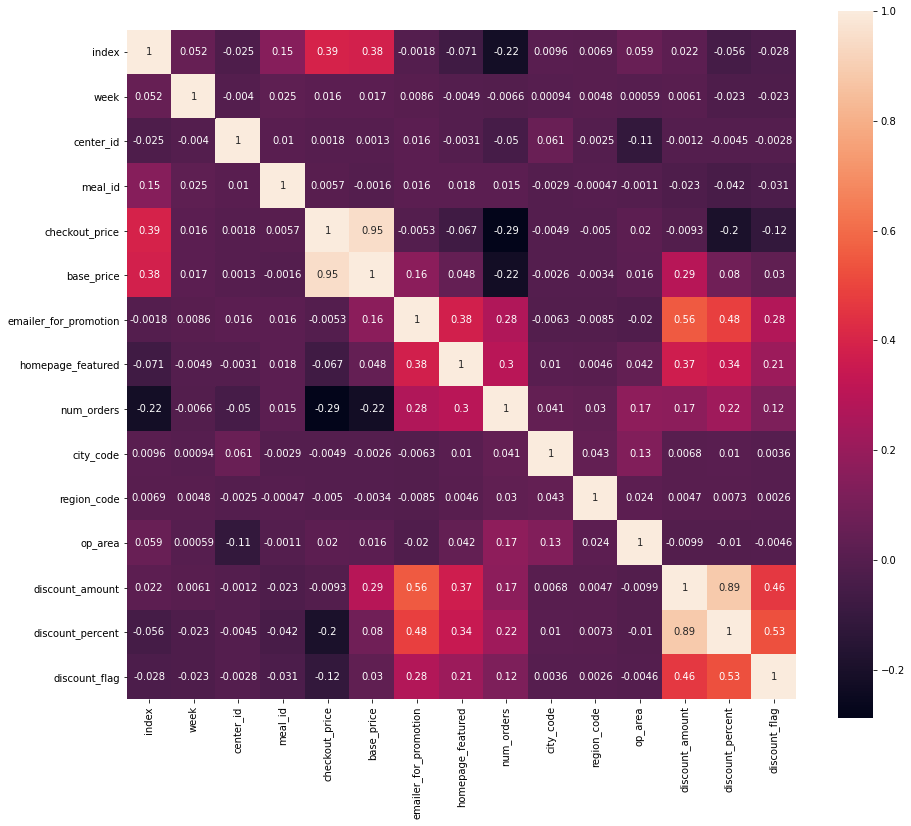

In [ ]:
plt.figure(figsize=(15, 13))
sns.heatmap(traindata.corr(),annot=True, square=True)

# Since our target variable is the num_orders so now carrying out the univariate , bivariate and multivariate analysis

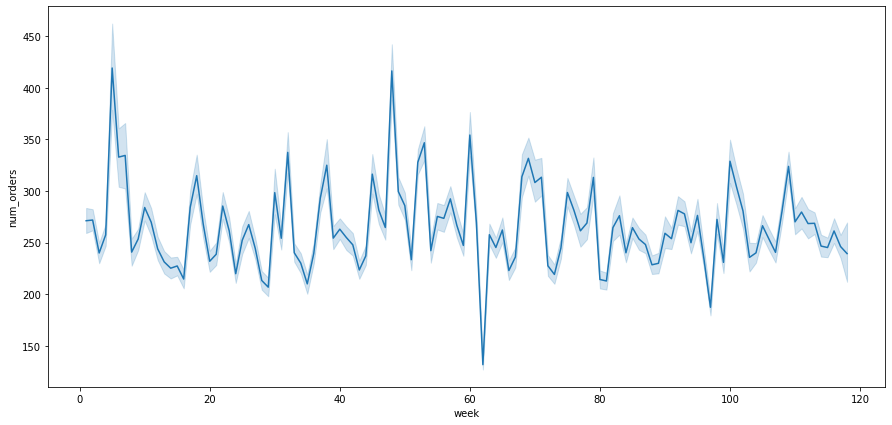

In [ ]:
# distribution of the number of orders in corresponding weeks
plt.figure(figsize = (15, 7))
sns.lineplot(x = traindata['week'], y= traindata['num_orders'])

#Studying the relation of number of orders with the categorical features

First studying the category wise order distribution

In [ ]:
# Now studying the number of orders according to the respective categories
plot_size = {
    "figsize": (16, 5),
    "fontsize": 11,
}
plt.style.use('seaborn') 


Text(0.5, 1.0, 'Orders by Categories')

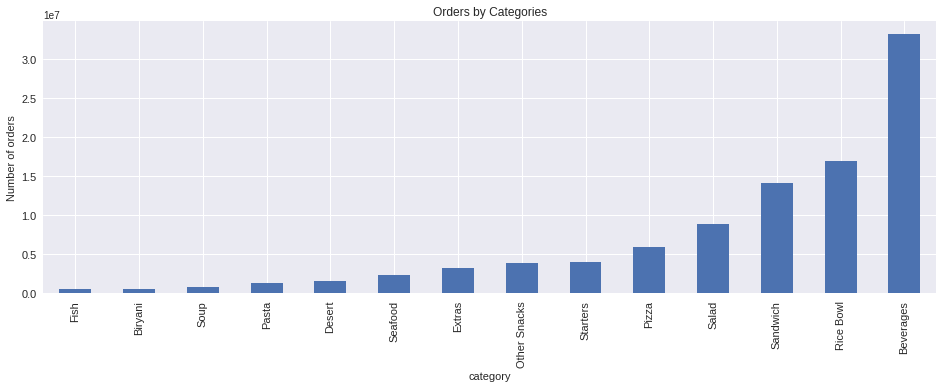

In [ ]:
traindata.groupby(["category"])["num_orders"].sum().sort_values().plot.bar(**plot_size)
plt.ylabel("Number of orders")
plt.title("Orders by Categories")

##Here we can clearly see that beverage items have more orders than other categories

But we also have to study the cuisine of each category and which category from each cuisine has the highest number of orders

Text(0.5, 1.0, 'Categories and their respective cuisines')

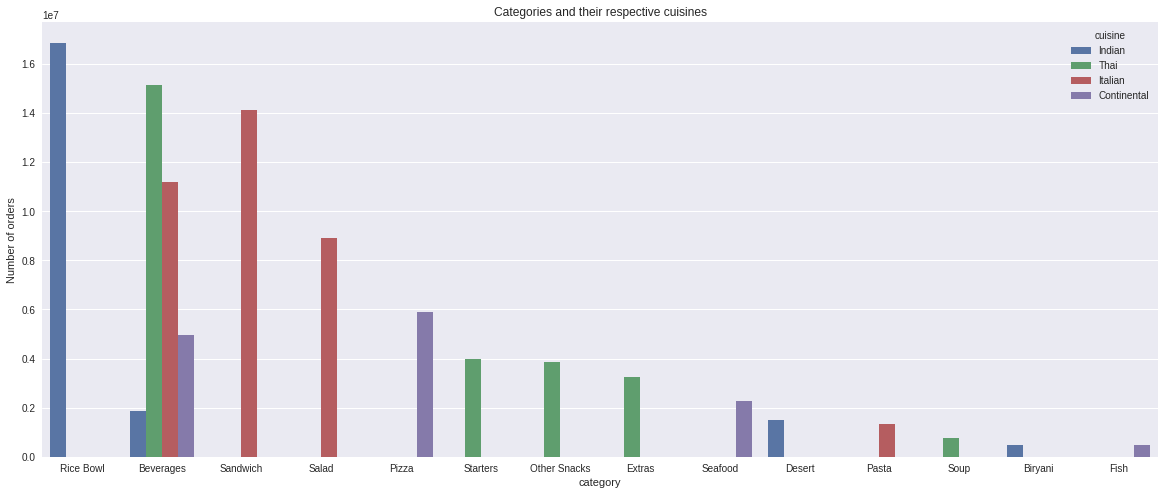

In [ ]:
fig=plt.figure(figsize=(20,8))
sns.barplot(x='category',y='num_orders',data=traindata.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine')
plt.ylabel("Number of orders")
plt.title("Categories and their respective cuisines")


Here it can be easily observed that Indian rice bowl has the highest Number of orders and ,Indian biriyani and continental fish have the lowest amount of orders

In [ ]:
labels = traindata.groupby(['cuisine']).num_orders.sum().index
values = traindata.groupby(['cuisine']).num_orders.sum()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, pull=[0.05, 0.05, 0.05, 0.05])])
fig.show()

We can clearly observe that Italian food has the highest number of orders while continental being least popular. This might have a relation with the prices of that particular cuisine.

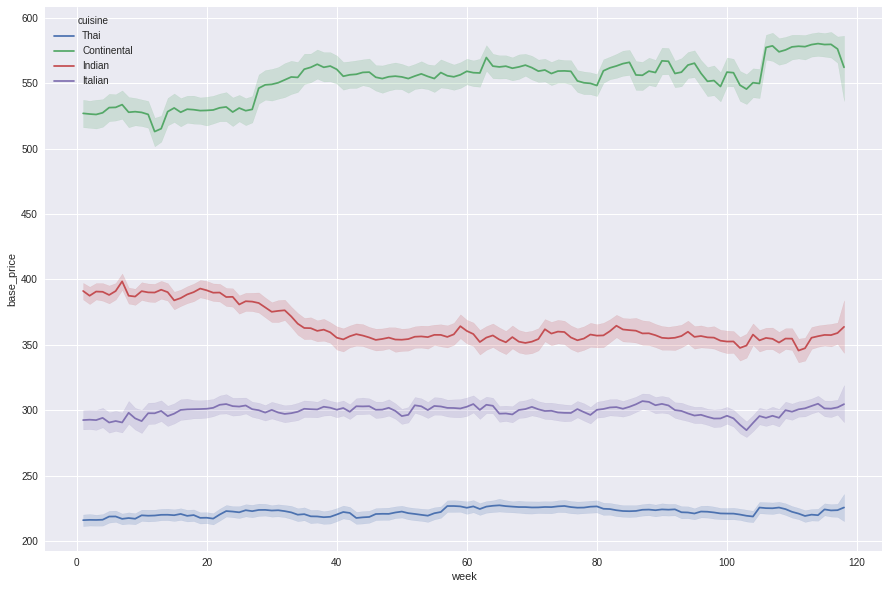

In [ ]:
fig=plt.figure(figsize=(15,10))
sns.lineplot(x="week", y="base_price", data=traindata, hue="cuisine")

In [ ]:
labels = traindata.groupby(['cuisine']).checkout_price.mean().index
values = traindata.groupby(['cuisine']).checkout_price.mean()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, pull=[0.05, 0.05, 0.05, 0.05])])
fig.show()

It is clearly evident , why continental cuisine has the lowest amount of orders , as it has the highest base price throughout the months

# Now analysing on the basis of the area


Observing the amount orders per region

Text(0.5, 1.0, 'Orders by region code')

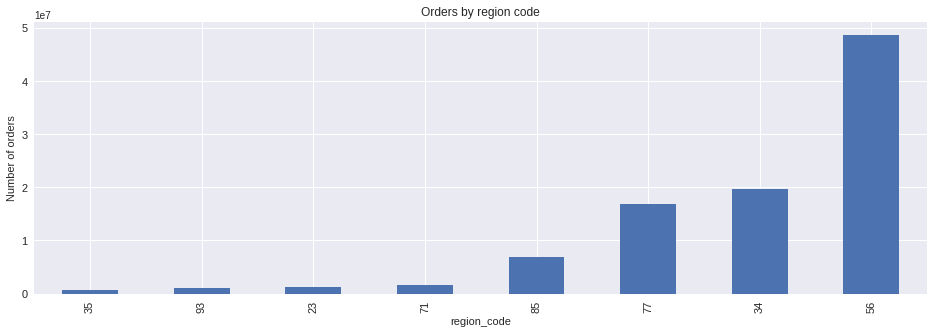

In [ ]:
# according to the region code
traindata.groupby(["region_code"])["num_orders"].sum().sort_values().plot.bar(**plot_size)
plt.ylabel("Number of orders")
plt.title("Orders by region code")

Here it is clearly observable that region 56 has the highest number of orders

Now analysing the number of orders in each city

Text(0.5, 1.0, 'Orders by city code')

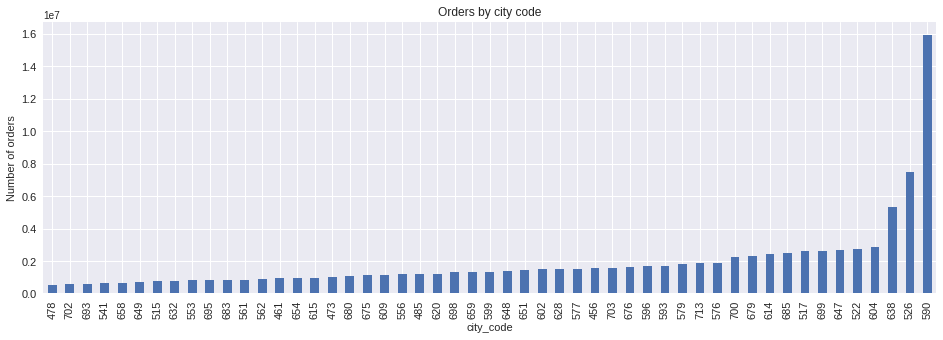

In [ ]:
# respective city codes
traindata.groupby(["city_code"])["num_orders"].sum().sort_values().plot.bar(**plot_size)
plt.ylabel("Number of orders")
plt.title("Orders by city code")

Here it can be observed that 3 cities (590, 526, 638) have the highest number of orders , all other cities are close to each other and have minute difference

In [ ]:
labels = traindata.groupby(['center_type']).num_orders.sum().index
values = traindata.groupby(['center_type']).num_orders.sum()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole = 0.3)])
fig.show()

Here we can clearly observe that TYPE A center has highest amount of orders

We have to investigate this further

Text(0.5, 0, 'Center ID')

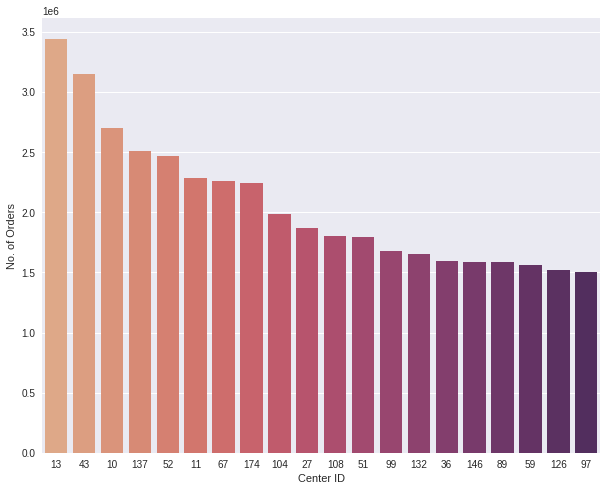

In [ ]:
fig=plt.figure(figsize=(10,8))
data=traindata.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)
order=list(traindata.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id'])
sns.barplot(y='num_orders', x='center_id', data = data,order = order, palette = 'flare')
plt.ylabel('No. of Orders')
plt.xlabel('Center ID')

Here Type A center had the most amount of orders but the highest order have come from center ID 13 of type B , so we have to analyse this

Text(0.5, 0, 'Center Type')

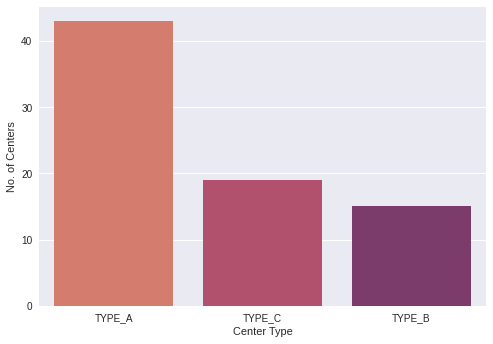

In [ ]:
yaxisData = traindata.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts()
xaxisData = traindata.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts().index
sns.barplot(y= yaxisData, x= xaxisData,palette = 'flare' );
plt.ylabel('No. of Centers')
plt.xlabel('Center Type')

This is clearly visible that center type A has the highest number of centers. So its obvious that it will have most amount of orders

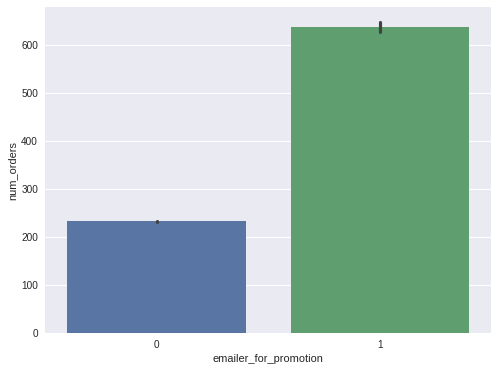

In [ ]:
# respective emailed for promotion
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(x = "emailer_for_promotion", y = "num_orders", ax = ax, data = traindata)

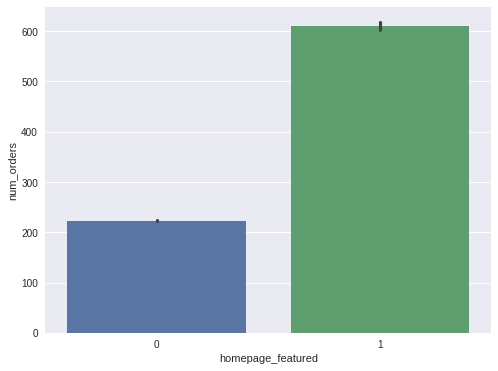

In [ ]:
# respective emailed for promotion
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(x = "homepage_featured", y = "num_orders", ax = ax, data = traindata)

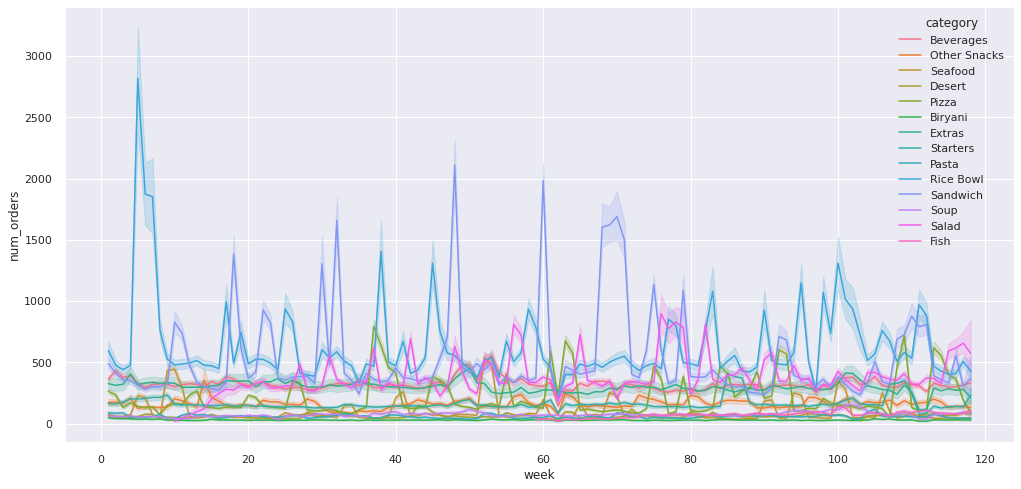

In [ ]:
# number of orders on the basis of different categories in different weeks
sns.set(rc={'figure.figsize':(17, 8)})
sns.lineplot(x="week", y="num_orders", data=traindata, hue="category")

In [ ]:
traindata.head()

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1
2,299851,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,36.83,13.091387,1
3,299996,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,2.00,0.795893,1
4,31140,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,2.00,1.472104,1


In [ ]:
# which center type gives the highest discounts on average
labels = traindata.groupby(['center_type']).discount_amount.mean().index
values = traindata.groupby(['center_type']).discount_amount.mean()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole = 0.3)])
fig.show()

Text(0.5, 1.0, 'Average discounts given by different cities')

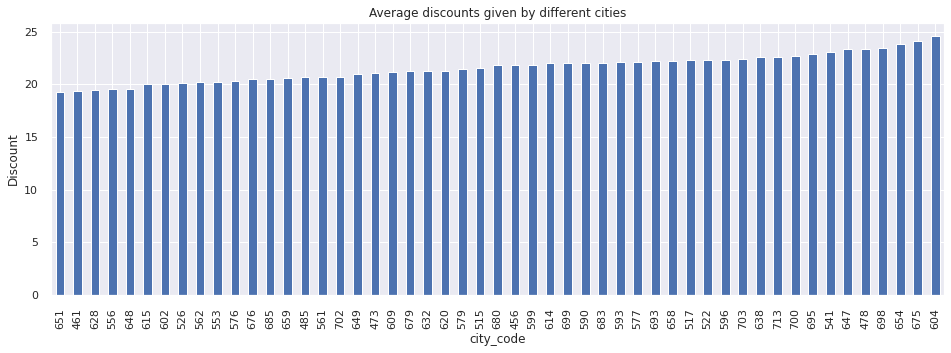

In [ ]:
# respective city codes
traindata.groupby(["city_code"])["discount_amount"].mean().sort_values().plot.bar(**plot_size)
plt.ylabel("Discount")
plt.title("Average discounts given by different cities")

Text(0.5, 1.0, 'Average discounts for each cuisine')

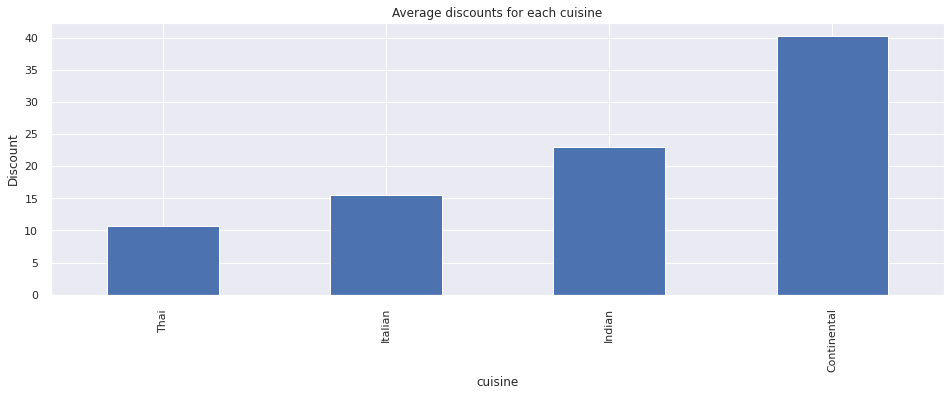

In [ ]:
# respective average discount amounts for every cuisine
traindata.groupby(["cuisine"])["discount_amount"].mean().sort_values().plot.bar(**plot_size)
plt.ylabel("Discount")
plt.title("Average discounts for each cuisine")

In [ ]:
traindata.head()

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1
2,299851,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,36.83,13.091387,1
3,299996,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,2.00,0.795893,1
4,31140,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,2.00,1.472104,1


# Feature engineering 

In [ ]:
traindata.dtypes

index                      int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
discount_amount          float64
discount_percent         float64
discount_flag              int64
dtype: object

In [ ]:
traindata.select_dtypes(include='number').nunique()

index                    365238
week                        118
center_id                    77
meal_id                      51
checkout_price             1932
base_price                 1836
emailer_for_promotion         2
homepage_featured             2
num_orders                 1199
city_code                    51
region_code                   8
op_area                      30
discount_amount            4699
discount_percent          37713
discount_flag                 2
dtype: int64

Here, we can see that there are some features that have an abnormally low number of unique values. That is indicative that those numerical values actually stand for categorical values.
These are city_code, region_code, op_area, meal_id, center_id.

emailed_for_promotion, homepage_featured are binary attributes

In [ ]:
traindata['city_code'] = traindata.city_code.astype(str)
traindata['region_code'] = traindata.region_code.astype(str)
traindata['op_area'] = traindata.op_area.astype(str)
traindata['meal_id'] = traindata.meal_id.astype(str)
traindata['center_id'] = traindata.center_id.astype(str)

In [ ]:
traindata.dtypes

index                      int64
week                       int64
center_id                 object
meal_id                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                 object
region_code               object
center_type               object
op_area                   object
category                  object
cuisine                   object
discount_amount          float64
discount_percent         float64
discount_flag              int64
dtype: object

In [ ]:
traindata.head()

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1
2,299851,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,36.83,13.091387,1
3,299996,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,2.00,0.795893,1
4,31140,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,2.00,1.472104,1


In [ ]:
traindata.select_dtypes(include='object').nunique()

center_id      77
meal_id        51
city_code      51
region_code     8
center_type     3
op_area        30
category       14
cuisine         4
dtype: int64

In [ ]:
# making a feature - Average discount given by each fullfillment center
traindata["average_discounts_for_centers"] = traindata['center_id'].map(traindata.groupby("center_id")["discount_amount"].mean())
traindata["average_discounts_for_centers"].head(80)

0     25.922984
1     21.207721
2     20.608453
3     20.208686
4     20.772675
        ...    
75    22.250230
76    22.048913
77    22.624870
78    21.202999
79    20.231779
Name: average_discounts_for_centers, Length: 80, dtype: float64

In [ ]:
traindata.head()

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag,average_discounts_for_centers
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,25.922984
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1,21.207721
2,299851,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,36.83,13.091387,1,20.608453
3,299996,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,2.00,0.795893,1,20.208686
4,31140,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,2.00,1.472104,1,20.772675


In [ ]:
traindata.corr()["num_orders"]["average_discounts_for_centers"]

-0.04667551629226795

In [ ]:
# Since there is very less correlation , so we dont need this feature
traindata.drop("average_discounts_for_centers", axis = 1, inplace = True)

In [ ]:
traindata.head(2)

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1


In [ ]:
train_set = traindata.copy()

In [ ]:
train_set.head(2)

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1


In [ ]:
# retrieving quarters from the given weeks
train_set['quarter'] = (train_set['week']/13).astype('int64')
train_set['quarter'] = train_set['quarter']%4 + 1

In [ ]:
train_set['quarter']

0         1
1         1
2         1
3         1
4         1
         ..
365233    2
365234    2
365235    2
365236    2
365237    2
Name: quarter, Length: 365238, dtype: int64

In [ ]:
train_set.head(2)

,index,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag,quarter
0,0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,1
1,299714,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83,14.107605,1,1


In [ ]:
# retriving year from the given weeks
train_set['year']=((train_set['week']/52)+1).astype('int64')

In [ ]:
train_set['year']

0         1
1         1
2         1
3         1
4         1
         ..
365233    3
365234    3
365235    3
365236    3
365237    3
Name: year, Length: 365238, dtype: int64

In [ ]:
# retrieving months from the weeks
train_set['month']=(((train_set['week']/4)%12)+1).astype('int64')
train_set['month'].value_counts()

5     37527
3     37038
2     36887
4     36819
1     34222
6     31898
11    25441
12    25391
9     25105
8     25033
10    25007
7     24870
Name: month, dtype: int64

In [ ]:
# generating new features
# Moving averages of discount percentages for each quarter and year 

In [ ]:
# for quarter
train_set["average_discounts_for_quarter"] = train_set['quarter'].map(train_set.groupby("quarter")["discount_amount"].mean())
# train_set.head()
train_set["average_discounts_for_quarter"].value_counts()

22.534048    117671
17.860652     83639
21.337839     82391
24.353433     81537
Name: average_discounts_for_quarter, dtype: int64

In [ ]:
# for months
train_set["average_discounts_for_months"] = train_set['month'].map(train_set.groupby("month")["discount_amount"].mean())
# train_set.head()
train_set["average_discounts_for_months"].value_counts()

20.941757    37527
18.496352    37038
24.094443    36887
21.934367    36819
17.473435    34222
18.829235    31898
25.704852    25441
24.884483    25391
18.907076    25105
20.063237    25033
29.352832    25007
21.172460    24870
Name: average_discounts_for_months, dtype: int64

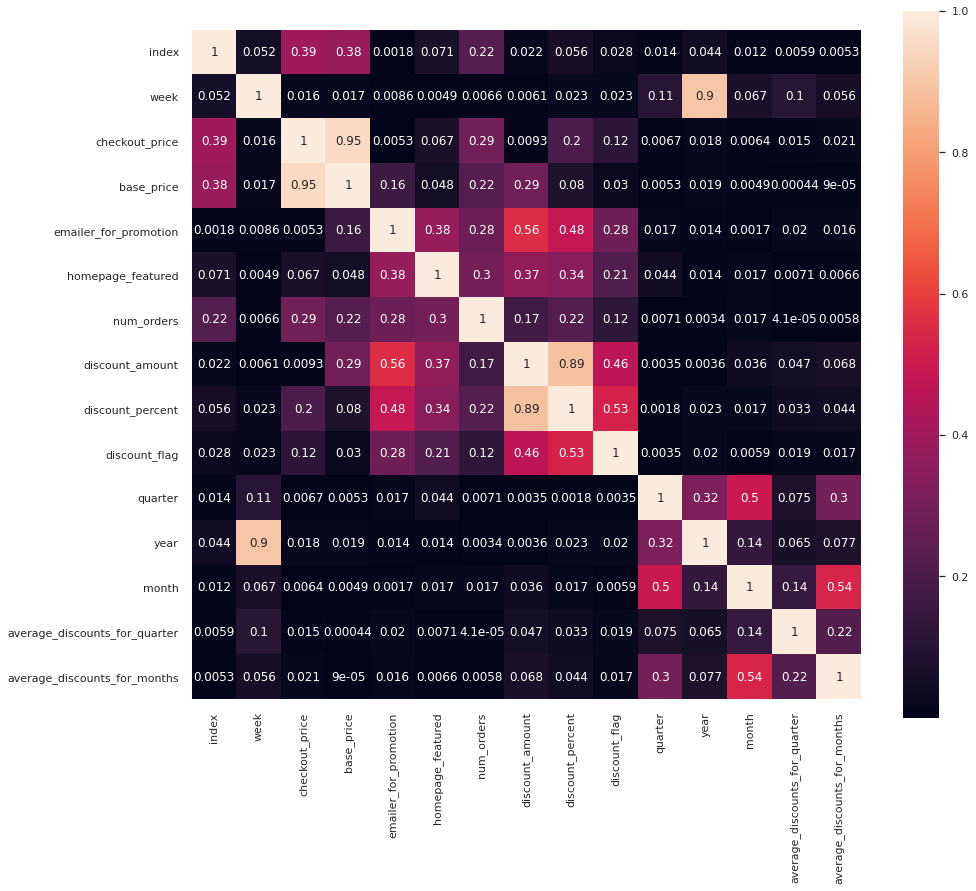

In [ ]:
plt.figure(figsize=(15, 13))
sns.heatmap(train_set.corr().abs(),annot=True, square=True)

# Feature scaling



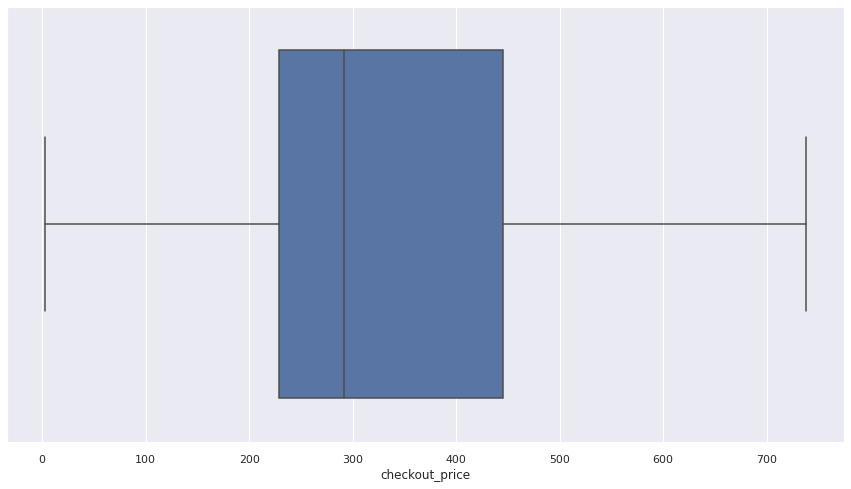

In [ ]:
dims = (15, 8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(x=train_set['checkout_price'], ax = ax)

In [ ]:
# scaling the features which has a higher spread
scaler = StandardScaler()
tempTrain = train_set.drop(['checkout_price','base_price','discount_amount'], axis = 1)
scaleColumns = train_set[['checkout_price','base_price','discount_amount']]
scale = pd.DataFrame(scaler.fit_transform(scaleColumns), columns = scaleColumns.columns)
tempTrain2 = pd.concat([tempTrain, scale], axis = 1)
tempTrain2.head(5)

,index,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,0,1,55,1885,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684,1,1,1,1,22.534048,17.473435,-1.266707,-1.249674,-0.127321
1,299714,1,11,1525,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,14.107605,1,1,1,1,22.534048,17.473435,-0.575448,-0.436227,0.378009
2,299851,1,83,1525,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,13.091387,1,1,1,1,22.534048,17.473435,-0.562365,-0.442483,0.315802
3,299996,1,32,1525,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,0.795893,1,1,1,1,22.534048,17.473435,-0.531030,-0.630393,-0.406424
4,31140,1,43,2539,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,1.472104,1,1,1,1,22.534048,17.473435,-1.286135,-1.352449,-0.406424


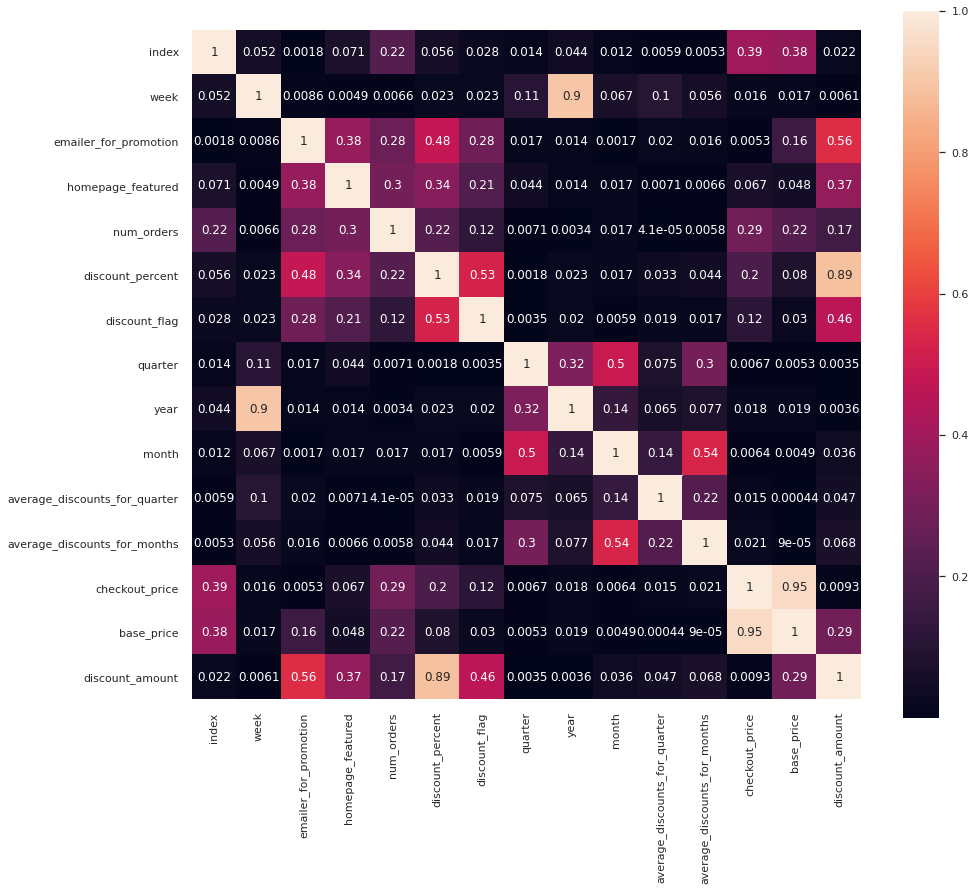

In [ ]:
plt.figure(figsize=(15, 13))
sns.heatmap(tempTrain2.corr().abs(),annot=True, square=True)

In [ ]:
tempTrain2.head()

,index,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,0,1,55,1885,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684,1,1,1,1,22.534048,17.473435,-1.266707,-1.249674,-0.127321
1,299714,1,11,1525,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,14.107605,1,1,1,1,22.534048,17.473435,-0.575448,-0.436227,0.378009
2,299851,1,83,1525,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,13.091387,1,1,1,1,22.534048,17.473435,-0.562365,-0.442483,0.315802
3,299996,1,32,1525,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,0.795893,1,1,1,1,22.534048,17.473435,-0.531030,-0.630393,-0.406424
4,31140,1,43,2539,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,1.472104,1,1,1,1,22.534048,17.473435,-1.286135,-1.352449,-0.406424


# Feature encoding 

Now we need to encode the categorical features

First making the mapping dictionaries for all the categorical features

In [ ]:
tempTrain2.select_dtypes(include='object').nunique()

center_id      77
meal_id        51
city_code      51
region_code     8
center_type     3
op_area        30
category       14
cuisine         4
dtype: int64

Going for mean encoding for each categorical variable as Label encoding is not a good choice and can impart unnessecary ranking to out categorical features which is not desired. One hot encoding can create problems in the case of unknown categorical features if encountered during validation and testing. 

1. Center type

In [ ]:
# firstly encoding center type:
center_type_freq = tempTrain2["center_type"].value_counts()
print(center_type_freq)

TYPE_A    210498
TYPE_C     79834
TYPE_B     74906
Name: center_type, dtype: int64


In [ ]:
# mapping the mean encodes in a dictionary
center_type_freq = center_type_freq.nlargest(n = 3, keep = 'first')
center_type_freq = center_type_freq/tempTrain2.size
center_type_freq_mapping = center_type_freq.to_dict()

In [ ]:
print(center_type_freq_mapping)

{'TYPE_A': 0.025057871734380704, 'TYPE_C': 0.009503511349478612, 'TYPE_B': 0.008916877785705902}


In [ ]:
# Now handling the new labels(the labels which will be new) , type B has the least 
# amount of occurrences so new labels will be encoded the same as that of type B
center_type_freq_mapping["other"] = center_type_freq_mapping['TYPE_B']
print(center_type_freq_mapping)

{'TYPE_A': 0.025057871734380704, 'TYPE_C': 0.009503511349478612, 'TYPE_B': 0.008916877785705902, 'other': 0.008916877785705902}


2. center_id

In [ ]:
center_id_freq = tempTrain2["center_id"].value_counts()
print(center_id_freq)

clen = len(center_id_freq)
print(clen)
# keeping the most significant (most occuring) center ids as they represent most of the dataset 
center_id_freq = center_id_freq.nlargest(n = clen//2, keep = 'first')
center_id_freq = center_id_freq/tempTrain2.size
center_id_freq_mapping = center_id_freq.to_dict()

# if a new value is found apart from the mean encodes already mapped in the dictionary 
# then it will be substituted by the minimum value of the dictionary
substitute_value = min(center_id_freq_mapping.values())
center_id_freq_mapping["other"] = substitute_value
print(center_id_freq_mapping)

13     5624
10     5599
52     5585
43     5570
67     5522
       ... 
139    3708
57     3607
162    3507
41     3270
91     2656
Name: center_id, Length: 77, dtype: int64
77
{'13': 0.0006694860313834672, '10': 0.0006665100088399774, '52': 0.0006648434362156231, '43': 0.0006630578226895292, '67': 0.0006573438594060288, '137': 0.00065698673670081, '27': 0.0006548440004694973, '51': 0.000653772632353841, '174': 0.0006529393460416638, '108': 0.0006516298961225283, '11': 0.0006492490780877364, '132': 0.0006469873009546843, '36': 0.0006450826465268508, '104': 0.0006393686832433503, '59': 0.0006388925196363919, '153': 0.0006386544378329127, '30': 0.0006375830697172564, '89': 0.0006374640288155168, '20': 0.0006336547199598499, '53': 0.0006219887115893699, '23': 0.0006167509119128278, '126': 0.0006153224210919527, '80': 0.0006102036623171502, '17': 0.0006094894169067127, '109': 0.0006007994310797224, '72': 0.0005954425905014408, '101': 0.0005941331405823053, '99': 0.0005916332816457738, '146

meal_id

In [ ]:
meal_id_freq = tempTrain2["meal_id"].value_counts()
# print(meal_id_freq)

clen = len(meal_id_freq)
print(clen)
meal_id_freq = meal_id_freq.nlargest(n = clen//2, keep = 'first')
meal_id_freq = meal_id_freq/tempTrain2.size
meal_id_freq_mapping = meal_id_freq.to_dict()


substitute_value = min(meal_id_freq_mapping.values())
meal_id_freq_mapping["other"] = substitute_value
print(meal_id_freq_mapping)

51
{'1062': 0.0010711300338528517, '1727': 0.0010708919520493725, '2290': 0.0010702967475406744, '1109': 0.0010702967475406744, '1754': 0.0010699396248354557, '2707': 0.001069820583933716, '1778': 0.0010694634612284973, '1962': 0.0010686301749163202, '1993': 0.0010681540113093618, '1971': 0.0010670826431937056, '1885': 0.001066368397783268, '2581': 0.0010638685388467365, '2826': 0.0010606544344997676, '2322': 0.0010568451256441006, '1558': 0.0010499407533432043, '1207': 0.0010349415997240156, '2640': 0.0010337511907066196, '1230': 0.0010317274953770465, '1878': 0.0010166093008561184, '2631': 0.0010061337015030342, '2539': 0.000994229611329075, '2760': 0.0009836349710742513, '1543': 0.0009695881446689794, '1248': 0.0009576840544950201, '1445': 0.0009503035185871654, 'other': 0.0009503035185871654}


In [ ]:
# city_code
city_code_freq = tempTrain2["city_code"].value_counts()
# print(city_code_freq)

clen = len(city_code_freq)
print(clen)
city_code_freq = city_code_freq.nlargest(n = clen//2, keep = 'first')
city_code_freq = city_code_freq/tempTrain2.size
city_code_freq_mapping = city_code_freq.to_dict()


substitute_value = min(city_code_freq_mapping.values())
city_code_freq_mapping["other"] = substitute_value
print(city_code_freq_mapping)

51
{'590': 0.005198159056262777, '526': 0.004156194043336126, '638': 0.0019065590822613106, '522': 0.001280642020914534, '517': 0.0012545720634335633, '604': 0.0012477867320344067, '699': 0.0011585060557297124, '647': 0.001127674462179158, '576': 0.001094700132397291, '676': 0.0010638685388467365, '614': 0.0010544643076093087, '593': 0.0010302990045561716, '685': 0.0006648434362156231, '713': 0.0006548440004694973, '700': 0.0006529393460416638, '579': 0.0006516298961225283, '679': 0.0006492490780877364, '456': 0.0006388925196363919, '703': 0.0006374640288155168, '698': 0.0006167509119128278, '577': 0.0006153224210919527, '599': 0.0006007994310797224, '596': 0.0005916332816457738, '654': 0.0005785387824544186, '648': 0.000578419741552679, 'other': 0.000578419741552679}


In [ ]:
# region_code
region_code_freq = tempTrain2["region_code"].value_counts()
# print(city_code_freq)

clen = len(region_code_freq)
print(clen)
region_code_freq = region_code_freq.nlargest(n = clen//2, keep = 'first')
region_code_freq = region_code_freq/tempTrain2.size
region_code_freq_mapping = region_code_freq.to_dict()


substitute_value = min(region_code_freq_mapping.values())
region_code_freq_mapping["other"] = substitute_value
print(region_code_freq_mapping)

8
{'56': 0.01821111522992631, '34': 0.011123419940350985, '77': 0.009019252961201952, '85': 0.0028678143638085182, 'other': 0.0028678143638085182}


In [ ]:
# op_area

op_area_freq = tempTrain2["op_area"].value_counts()

clen = len(op_area_freq)
print(clen)
op_area_freq = op_area_freq.nlargest(n = clen//2, keep = 'first')
op_area_freq = op_area_freq/tempTrain2.size
op_area_freq_mapping = op_area_freq.to_dict()


substitute_value = min(op_area_freq_mapping.values())
op_area_freq_mapping["other"] = substitute_value
print(op_area_freq_mapping)

30
{'4.0': 0.0050088840224968255, '3.9': 0.004618310823889224, '3.8': 0.003816808432476548, '4.4': 0.0024855740283226875, '4.5': 0.0024441477945173094, '2.8': 0.0024423621809912155, '4.1': 0.0022195176129346985, '7.0': 0.0019640558378015336, '4.8': 0.0017729951905094878, '3.4': 0.001652406757047281, '3.6': 0.0015790775615756921, '5.1': 0.0012732614850066795, '4.2': 0.001198027635107257, '2.7': 0.0011938612035463712, '3.0': 0.0010708919520493725, 'other': 0.0010708919520493725}


In [ ]:
# category

category_freq = tempTrain2["category"].value_counts()

clen = len(category_freq)
print(clen)
category_freq = category_freq.nlargest(n = clen, keep = 'first')
category_freq = category_freq/tempTrain2.size
category_freq_mapping = category_freq.to_dict()


substitute_value = min(category_freq_mapping.values())
category_freq_mapping["other"] = substitute_value
print(category_freq_mapping)

14
{'Beverages': 0.012261808083686706, 'Rice Bowl': 0.0032114854471307214, 'Sandwich': 0.0031976767025289287, 'Pizza': 0.003182439467106261, 'Starters': 0.0028944795257981873, 'Other Snacks': 0.0028023418678517426, 'Desert': 0.0027840095689838453, 'Pasta': 0.0026738967348747225, 'Salad': 0.002635208441809355, 'Seafood': 0.002611043138756218, 'Biryani': 0.0019648891241137107, 'Extras': 0.001288260638625868, 'Soup': 0.0012111221342986122, 'Fish': 0.0007595999940003385, 'other': 0.0007595999940003385}


In [ ]:
# cuisine

cuisine_freq = tempTrain2["cuisine"].value_counts()

clen = len(cuisine_freq)
print(clen)
cuisine_freq = cuisine_freq.nlargest(n = clen, keep = 'first')
cuisine_freq = cuisine_freq/tempTrain2.size
cuisine_freq_mapping = cuisine_freq.to_dict()


substitute_value = min(cuisine_freq_mapping.values())
cuisine_freq_mapping["other"] = substitute_value
print(cuisine_freq_mapping)

4
{'Italian': 0.011717195958228071, 'Thai': 0.011324956186996115, 'Indian': 0.010759511903733051, 'Continental': 0.00967659682060798, 'other': 0.00967659682060798}


Mapping the dictionaries to the respective labels

In [ ]:
# mapping the features to their respective codes in the dictionary
def mean_encode_from_dict(x, dict_mapping):
  if x in dict_mapping:
    return dict_mapping[x]
  else:
    return dict_mapping["other"]



In [ ]:
# encoding the categorical variables
tempTrain2["category"] = tempTrain2["category"].apply(mean_encode_from_dict,dict_mapping= category_freq_mapping)
tempTrain2["cuisine"] = tempTrain2["cuisine"].apply(mean_encode_from_dict,dict_mapping= cuisine_freq_mapping)
tempTrain2["op_area"] = tempTrain2["op_area"].apply(mean_encode_from_dict,dict_mapping= op_area_freq_mapping)
tempTrain2["region_code"] = tempTrain2["region_code"].apply(mean_encode_from_dict,dict_mapping= region_code_freq_mapping)
tempTrain2["city_code"] = tempTrain2["city_code"].apply(mean_encode_from_dict,dict_mapping= city_code_freq_mapping)
tempTrain2["meal_id"] = tempTrain2["meal_id"].apply(mean_encode_from_dict,dict_mapping= meal_id_freq_mapping)
tempTrain2["center_id"] = tempTrain2["center_id"].apply(mean_encode_from_dict,dict_mapping= center_id_freq_mapping)
tempTrain2["center_type"] = tempTrain2["center_type"].apply(mean_encode_from_dict,dict_mapping= center_type_freq_mapping)

In [ ]:
tempTrain2.head()

,index,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,0,1,0.000567,0.001066,0,0,177,0.001128,0.018211,0.009504,0.001071,0.012262,0.011325,10.151684,1,1,1,1,22.534048,17.473435,-1.266707,-1.249674,-0.127321
1,299714,1,0.000649,0.000950,0,1,460,0.000649,0.018211,0.025058,0.001071,0.002802,0.011325,14.107605,1,1,1,1,22.534048,17.473435,-0.575448,-0.436227,0.378009
2,299851,1,0.000576,0.000950,0,0,94,0.000578,0.009019,0.025058,0.001071,0.002802,0.011325,13.091387,1,1,1,1,22.534048,17.473435,-0.562365,-0.442483,0.315802
3,299996,1,0.000567,0.000950,0,0,82,0.004156,0.011123,0.025058,0.003817,0.002802,0.011325,0.795893,1,1,1,1,22.534048,17.473435,-0.531030,-0.630393,-0.406424
4,31140,1,0.000663,0.000994,0,0,675,0.005198,0.018211,0.025058,0.001273,0.012262,0.011325,1.472104,1,1,1,1,22.534048,17.473435,-1.286135,-1.352449,-0.406424


Now since all the features are encoded , so now comes the feature selection part

#Feature selection


In [ ]:
tempTrain2.head()

,index,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,0,1,0.000567,0.001066,0,0,177,0.001128,0.018211,0.009504,0.001071,0.012262,0.011325,10.151684,1,1,1,1,22.534048,17.473435,-1.266707,-1.249674,-0.127321
1,299714,1,0.000649,0.000950,0,1,460,0.000649,0.018211,0.025058,0.001071,0.002802,0.011325,14.107605,1,1,1,1,22.534048,17.473435,-0.575448,-0.436227,0.378009
2,299851,1,0.000576,0.000950,0,0,94,0.000578,0.009019,0.025058,0.001071,0.002802,0.011325,13.091387,1,1,1,1,22.534048,17.473435,-0.562365,-0.442483,0.315802
3,299996,1,0.000567,0.000950,0,0,82,0.004156,0.011123,0.025058,0.003817,0.002802,0.011325,0.795893,1,1,1,1,22.534048,17.473435,-0.531030,-0.630393,-0.406424
4,31140,1,0.000663,0.000994,0,0,675,0.005198,0.018211,0.025058,0.001273,0.012262,0.011325,1.472104,1,1,1,1,22.534048,17.473435,-1.286135,-1.352449,-0.406424


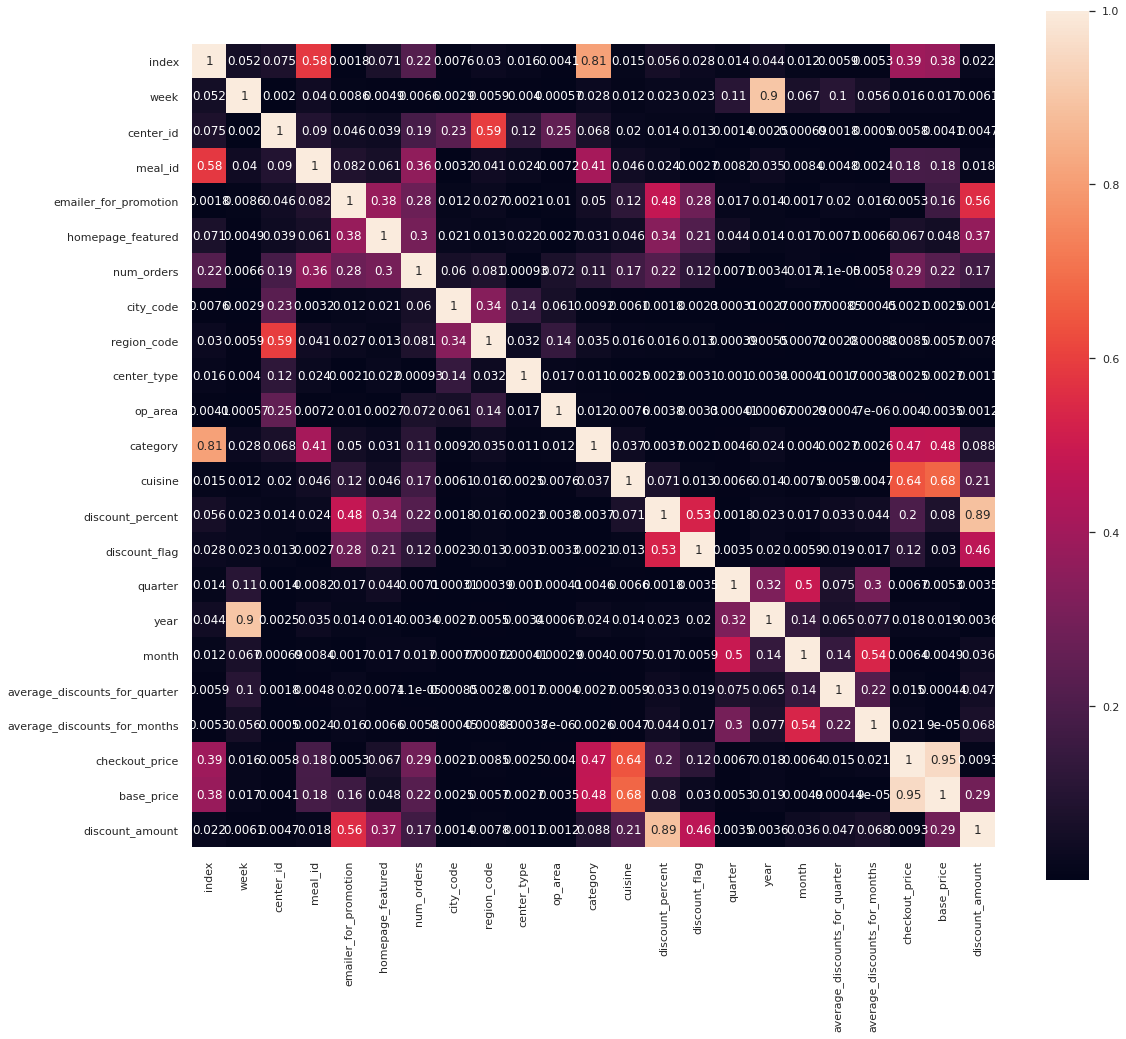

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(tempTrain2.corr().abs(),annot=True, square=True)

In [ ]:
tempTrain2.drop('index', axis = 1, inplace = True)

In [ ]:
cor_matrix = tempTrain2.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                               week  center_id  ...  base_price  discount_amount
week                            NaN   0.002017  ...    0.017233         0.006104
center_id                       NaN        NaN  ...    0.004093         0.004741
meal_id                         NaN        NaN  ...    0.182300         0.018161
emailer_for_promotion           NaN        NaN  ...    0.162924         0.556878
homepage_featured               NaN        NaN  ...    0.047841         0.370547
num_orders                      NaN        NaN  ...    0.224496         0.168315
city_code                       NaN        NaN  ...    0.002468         0.001429
region_code                     NaN        NaN  ...    0.005731         0.007850
center_type                     NaN        NaN  ...    0.002692         0.001104
op_area                         NaN        NaN  ...    0.003504         0.001195
category                        NaN        NaN  ...    0.480195         0.087796
cuisine                     

In [ ]:
# dropping the independent features which are highly correlated 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['year', 'base_price', 'discount_amount']


In [ ]:
# dropping the following features
to_drop.append('week')
tempTrain2.drop(to_drop, axis = 1, inplace = True)

In [ ]:
tempTrain2.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price
0,0.000567,0.001066,0,0,177,0.001128,0.018211,0.009504,0.001071,0.012262,0.011325,10.151684,1,1,1,22.534048,17.473435,-1.266707
1,0.000649,0.000950,0,1,460,0.000649,0.018211,0.025058,0.001071,0.002802,0.011325,14.107605,1,1,1,22.534048,17.473435,-0.575448
2,0.000576,0.000950,0,0,94,0.000578,0.009019,0.025058,0.001071,0.002802,0.011325,13.091387,1,1,1,22.534048,17.473435,-0.562365
3,0.000567,0.000950,0,0,82,0.004156,0.011123,0.025058,0.003817,0.002802,0.011325,0.795893,1,1,1,22.534048,17.473435,-0.531030
4,0.000663,0.000994,0,0,675,0.005198,0.018211,0.025058,0.001273,0.012262,0.011325,1.472104,1,1,1,22.534048,17.473435,-1.286135


In [ ]:
Xtrain = tempTrain2.drop("num_orders", axis = 1)
Ytrain = tempTrain2["num_orders"]
Xtrain.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price
0,0.000567,0.001066,0,0,0.001128,0.018211,0.009504,0.001071,0.012262,0.011325,10.151684,1,1,1,22.534048,17.473435,-1.266707
1,0.000649,0.000950,0,1,0.000649,0.018211,0.025058,0.001071,0.002802,0.011325,14.107605,1,1,1,22.534048,17.473435,-0.575448
2,0.000576,0.000950,0,0,0.000578,0.009019,0.025058,0.001071,0.002802,0.011325,13.091387,1,1,1,22.534048,17.473435,-0.562365
3,0.000567,0.000950,0,0,0.004156,0.011123,0.025058,0.003817,0.002802,0.011325,0.795893,1,1,1,22.534048,17.473435,-0.531030
4,0.000663,0.000994,0,0,0.005198,0.018211,0.025058,0.001273,0.012262,0.011325,1.472104,1,1,1,22.534048,17.473435,-1.286135


In [ ]:
Ytrain.head()

0    177
1    460
2     94
3     82
4    675
Name: num_orders, dtype: int64

#Transforming the validation data according to our machine learning model

In [ ]:
valdata.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
365238,284979,1150510,118,94,2444,727.53,728.53,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental
365239,368181,1491945,118,10,1198,188.21,224.10,0,0,784,590,56,TYPE_B,6.3,Extras,Thai
365240,243538,1489219,118,36,1558,698.43,699.43,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental
365241,246379,1443896,118,113,1558,639.23,639.23,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental
365242,381725,1175284,118,50,2760,242.53,243.53,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai


In [ ]:
# following the same transformations 
valdata['discount_amount']=valdata['base_price']- valdata['checkout_price']
valdata['discount_percent'] = ((valdata['base_price']-valdata['checkout_price'])/valdata['base_price'])*100
valdata['discount_flag'] = [1 if x>0 else 0 for x in (valdata['base_price']-valdata['checkout_price'])]


valdata['city_code'] = valdata.city_code.astype(str)
valdata['region_code'] = valdata.region_code.astype(str)
valdata['op_area'] = valdata.op_area.astype(str)
valdata['meal_id'] = valdata.meal_id.astype(str)
valdata['center_id'] = valdata.center_id.astype(str)

valdata['quarter'] = (valdata['week']/13).astype('int64')
valdata['quarter'] = valdata['quarter']%4 + 1

valdata['year']=((valdata['week']/52)+1).astype('int64')

valdata['month']=(((valdata['week']/4)%12)+1).astype('int64')
valdata['month'].value_counts()


valdata["average_discounts_for_quarter"] = valdata['quarter'].map(valdata.groupby("quarter")["discount_amount"].mean())
valdata["average_discounts_for_quarter"].value_counts()
valdata["average_discounts_for_months"] = valdata['month'].map(valdata.groupby("month")["discount_amount"].mean())
valdata["average_discounts_for_months"].value_counts()

valdata.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
365238,284979,1150510,118,94,2444,727.53,728.53,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental,1.00,0.137263,1,2,3,6,24.778273,10.863448
365239,368181,1491945,118,10,1198,188.21,224.10,0,0,784,590,56,TYPE_B,6.3,Extras,Thai,35.89,16.015172,1,2,3,6,24.778273,10.863448
365240,243538,1489219,118,36,1558,698.43,699.43,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental,1.00,0.142974,1,2,3,6,24.778273,10.863448
365241,246379,1443896,118,113,1558,639.23,639.23,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental,0.00,0.000000,0,2,3,6,24.778273,10.863448
365242,381725,1175284,118,50,2760,242.53,243.53,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai,1.00,0.410627,1,2,3,6,24.778273,10.863448


In [ ]:
valdatacopy = valdata.copy()
valdatacopy.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
365238,284979,1150510,118,94,2444,727.53,728.53,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental,1.00,0.137263,1,2,3,6,24.778273,10.863448
365239,368181,1491945,118,10,1198,188.21,224.10,0,0,784,590,56,TYPE_B,6.3,Extras,Thai,35.89,16.015172,1,2,3,6,24.778273,10.863448
365240,243538,1489219,118,36,1558,698.43,699.43,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental,1.00,0.142974,1,2,3,6,24.778273,10.863448
365241,246379,1443896,118,113,1558,639.23,639.23,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental,0.00,0.000000,0,2,3,6,24.778273,10.863448
365242,381725,1175284,118,50,2760,242.53,243.53,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai,1.00,0.410627,1,2,3,6,24.778273,10.863448


In [ ]:
# feature scaling
scaler1 = StandardScaler()
tempval = valdata.drop(['checkout_price','base_price','discount_amount'], axis = 1)
scaleColumns1 = valdata[['checkout_price','base_price','discount_amount']]
tempval.head()

,index,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
365238,284979,1150510,118,94,2444,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental,0.137263,1,2,3,6,24.778273,10.863448
365239,368181,1491945,118,10,1198,0,0,784,590,56,TYPE_B,6.3,Extras,Thai,16.015172,1,2,3,6,24.778273,10.863448
365240,243538,1489219,118,36,1558,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental,0.142974,1,2,3,6,24.778273,10.863448
365241,246379,1443896,118,113,1558,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental,0.000000,0,2,3,6,24.778273,10.863448
365242,381725,1175284,118,50,2760,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai,0.410627,1,2,3,6,24.778273,10.863448


In [ ]:
tempval.reset_index(inplace= True)
tempval.head()

,level_0,index,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
0,365238,284979,1150510,118,94,2444,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental,0.137263,1,2,3,6,24.778273,10.863448
1,365239,368181,1491945,118,10,1198,0,0,784,590,56,TYPE_B,6.3,Extras,Thai,16.015172,1,2,3,6,24.778273,10.863448
2,365240,243538,1489219,118,36,1558,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental,0.142974,1,2,3,6,24.778273,10.863448
3,365241,246379,1443896,118,113,1558,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental,0.000000,0,2,3,6,24.778273,10.863448
4,365242,381725,1175284,118,50,2760,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai,0.410627,1,2,3,6,24.778273,10.863448


In [ ]:
tempval.drop(['level_0', 'index'], inplace=True, axis = 1)
tempval.head()

,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
0,1150510,118,94,2444,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental,0.137263,1,2,3,6,24.778273,10.863448
1,1491945,118,10,1198,0,0,784,590,56,TYPE_B,6.3,Extras,Thai,16.015172,1,2,3,6,24.778273,10.863448
2,1489219,118,36,1558,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental,0.142974,1,2,3,6,24.778273,10.863448
3,1443896,118,113,1558,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental,0.000000,0,2,3,6,24.778273,10.863448
4,1175284,118,50,2760,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai,0.410627,1,2,3,6,24.778273,10.863448


In [ ]:
scaleColumns1.head()

,checkout_price,base_price,discount_amount
365238,727.53,728.53,1.00
365239,188.21,224.10,35.89
365240,698.43,699.43,1.00
365241,639.23,639.23,0.00
365242,242.53,243.53,1.00


In [ ]:
scale1 = pd.DataFrame(scaler1.fit_transform(scaleColumns1), columns = scaleColumns1.columns)
scale1.head()

,checkout_price,base_price,discount_amount
0,2.536797,2.234299,-0.447874
1,-0.987524,-0.844953,0.256402
2,2.346636,2.056660,-0.447874
3,1.959779,1.689174,-0.468059
4,-0.632556,-0.726344,-0.447874


In [ ]:
tempval.head()

,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
0,1150510,118,94,2444,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental,0.137263,1,2,3,6,24.778273,10.863448
1,1491945,118,10,1198,0,0,784,590,56,TYPE_B,6.3,Extras,Thai,16.015172,1,2,3,6,24.778273,10.863448
2,1489219,118,36,1558,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental,0.142974,1,2,3,6,24.778273,10.863448
3,1443896,118,113,1558,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental,0.000000,0,2,3,6,24.778273,10.863448
4,1175284,118,50,2760,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai,0.410627,1,2,3,6,24.778273,10.863448


In [ ]:
tempval3 = pd.concat([tempval, scale1], axis = 1)
tempval3.head(5)

,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,1150510,118,94,2444,0,0,54,632,34,TYPE_C,3.6,Seafood,Continental,0.137263,1,2,3,6,24.778273,10.863448,2.536797,2.234299,-0.447874
1,1491945,118,10,1198,0,0,784,590,56,TYPE_B,6.3,Extras,Thai,16.015172,1,2,3,6,24.778273,10.863448,-0.987524,-0.844953,0.256402
2,1489219,118,36,1558,0,0,81,517,56,TYPE_B,4.4,Pizza,Continental,0.142974,1,2,3,6,24.778273,10.863448,2.346636,2.056660,-0.447874
3,1443896,118,113,1558,0,0,108,680,77,TYPE_C,4.0,Pizza,Continental,0.000000,0,2,3,6,24.778273,10.863448,1.959779,1.689174,-0.468059
4,1175284,118,50,2760,0,0,135,556,77,TYPE_A,4.8,Other Snacks,Thai,0.410627,1,2,3,6,24.778273,10.863448,-0.632556,-0.726344,-0.447874


In [ ]:
tempval3["category"] = tempval3["category"].apply(mean_encode_from_dict,dict_mapping= category_freq_mapping)
tempval3["cuisine"] = tempval3["cuisine"].apply(mean_encode_from_dict,dict_mapping= cuisine_freq_mapping)
tempval3["op_area"] = tempval3["op_area"].apply(mean_encode_from_dict,dict_mapping= op_area_freq_mapping)
tempval3["region_code"] = tempval3["region_code"].apply(mean_encode_from_dict,dict_mapping= region_code_freq_mapping)
tempval3["city_code"] = tempval3["city_code"].apply(mean_encode_from_dict,dict_mapping= city_code_freq_mapping)
tempval3["meal_id"] = tempval3["meal_id"].apply(mean_encode_from_dict,dict_mapping= meal_id_freq_mapping)
tempval3["center_id"] = tempval3["center_id"].apply(mean_encode_from_dict,dict_mapping= center_id_freq_mapping)
tempval3["center_type"] = tempval3["center_type"].apply(mean_encode_from_dict,dict_mapping= center_type_freq_mapping)

In [ ]:
tempval3.head()

,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,1150510,118,0.000567,0.000950,0,0,54,0.000578,0.011123,0.009504,0.001579,0.002611,0.009677,0.137263,1,2,3,6,24.778273,10.863448,2.536797,2.234299,-0.447874
1,1491945,118,0.000667,0.000950,0,0,784,0.005198,0.018211,0.008917,0.001071,0.001288,0.011325,16.015172,1,2,3,6,24.778273,10.863448,-0.987524,-0.844953,0.256402
2,1489219,118,0.000645,0.001050,0,0,81,0.001255,0.018211,0.008917,0.002486,0.003182,0.009677,0.142974,1,2,3,6,24.778273,10.863448,2.346636,2.056660,-0.447874
3,1443896,118,0.000567,0.001050,0,0,108,0.000578,0.009019,0.009504,0.005009,0.003182,0.009677,0.000000,0,2,3,6,24.778273,10.863448,1.959779,1.689174,-0.468059
4,1175284,118,0.000567,0.000984,0,0,135,0.000578,0.009019,0.025058,0.001773,0.002802,0.011325,0.410627,1,2,3,6,24.778273,10.863448,-0.632556,-0.726344,-0.447874


In [ ]:
tempTrain2.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price
0,0.000567,0.001066,0,0,177,0.001128,0.018211,0.009504,0.001071,0.012262,0.011325,10.151684,1,1,1,22.534048,17.473435,-1.266707
1,0.000649,0.000950,0,1,460,0.000649,0.018211,0.025058,0.001071,0.002802,0.011325,14.107605,1,1,1,22.534048,17.473435,-0.575448
2,0.000576,0.000950,0,0,94,0.000578,0.009019,0.025058,0.001071,0.002802,0.011325,13.091387,1,1,1,22.534048,17.473435,-0.562365
3,0.000567,0.000950,0,0,82,0.004156,0.011123,0.025058,0.003817,0.002802,0.011325,0.795893,1,1,1,22.534048,17.473435,-0.531030
4,0.000663,0.000994,0,0,675,0.005198,0.018211,0.025058,0.001273,0.012262,0.011325,1.472104,1,1,1,22.534048,17.473435,-1.286135


In [ ]:
drop_val_cols =  ['year', 'base_price', 'discount_amount', 'id', 'week']
tempval3.drop(drop_val_cols, inplace = True, axis =1)

In [ ]:
tempval3.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price
0,0.000567,0.000950,0,0,54,0.000578,0.011123,0.009504,0.001579,0.002611,0.009677,0.137263,1,2,6,24.778273,10.863448,2.536797
1,0.000667,0.000950,0,0,784,0.005198,0.018211,0.008917,0.001071,0.001288,0.011325,16.015172,1,2,6,24.778273,10.863448,-0.987524
2,0.000645,0.001050,0,0,81,0.001255,0.018211,0.008917,0.002486,0.003182,0.009677,0.142974,1,2,6,24.778273,10.863448,2.346636
3,0.000567,0.001050,0,0,108,0.000578,0.009019,0.009504,0.005009,0.003182,0.009677,0.000000,0,2,6,24.778273,10.863448,1.959779
4,0.000567,0.000984,0,0,135,0.000578,0.009019,0.025058,0.001773,0.002802,0.011325,0.410627,1,2,6,24.778273,10.863448,-0.632556


#Training

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

Random Forest regressor

In [ ]:
regressor = RandomForestRegressor(random_state=40, max_depth= 70)
Algorithm.append('Random forest Regression')
regressor.fit(Xtrain, Ytrain)
print("Train Accuracy:",regressor.score(Xtrain, Ytrain))

Train Accuracy: 0.9752334796690645


In [ ]:
X_val = tempval3.drop('num_orders', axis = 1)
Y_val = tempval3['num_orders']

In [ ]:
# predicting and getting the validation scores
predicted = regressor.predict(X_val)
mse = mean_squared_error(Y_val, predicted)
r2 = r2_score(Y_val, predicted)
MSE_Score.append(mse)
R2_Score.append(r2)
print("Mean sqaured error :")
print(mse)
print("R2 score :")
print(r2)

Mean sqaured error :
49845.17376919247
R2 score :
0.6278484264335938


Decision Tree regressor

In [ ]:
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(Xtrain, Ytrain)
print("Train Accuracy:",decisionTreeRegressor.score(Xtrain, Ytrain))

predicted = decisionTreeRegressor.predict(X_val)

mse = mean_squared_error(Y_val, predicted)
r2 = r2_score(Y_val, predicted)
Algorithm.append('Decision Tree Regression')
MSE_Score.append(mse)
R2_Score.append(r2)
print("Mean sqaured error :")
print(mse)
print("R2 score :")
print(r2)

Train Accuracy: 0.9957861144528546
Mean sqaured error :
80688.75368039281
R2 score :
0.3975656140689423


XG Boost regressor

In [ ]:
xgbRegressor = xgb.XGBRegressor()
xgbRegressor.fit(Xtrain, Ytrain)
print("Train Accuracy:",xgbRegressor.score(Xtrain, Ytrain))
predicted = xgbRegressor.predict(X_val)
Algorithm.append('XGBoost Regression')
mse = mean_squared_error(Y_val, predicted)
r2 = r2_score(Y_val, predicted)
MSE_Score.append(mse)
R2_Score.append(r2)
print("Mean sqaured error :")
print(mse)
print("R2 score :")
print(r2)

[08:41:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Accuracy: 0.6871679844936407
Mean sqaured error :
43756.19663269367
R2 score :
0.6733096466763137


In [ ]:
performance = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [ ]:
performance.head()

,Algorithm,MSE_Score,R2_Score
0,Random forest Regression,49845.173769,0.627848
1,Decision Tree Regression,80688.753680,0.397566
2,XGBoost Regression,43756.196633,0.673310


Since XGBoost regressor clearly performs better than other models so, further hyperparameter tuning will be done on XGBoost

In [ ]:
# after trying out several hyperparameters , these were the parameters on which the
# model performed its best

# grid search CV or randomized search CV cannot be used as this is a time series problem
# and performing k fold cross validation would hinder the training , that is why 
# trying out some hyperparamters and styudying the performance would be one of the
# methods to do hyperparameter tuning

xgb_model = xgb.XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

xgb_model.fit(Xtrain, Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [ ]:
predicted = xgb_model.predict(X_val)

In [ ]:
predicted

array([ 25.3366  , 502.26367 ,  38.79206 , ..., 844.6829  , 408.47424 ,
        47.249123], dtype=float32)

In [ ]:
mse = mean_squared_error(Y_val, predicted)
r2 = r2_score(Y_val, predicted)
print("Mean sqaured error :")
print(mse)
print("R2 score :")
print(r2)

Mean sqaured error :
35729.049979266085
R2 score :
0.7332415324021839


By doing hyperparameter tuning I was able to improve the performance of model even further

#Transforming the test set

In [ ]:
testdata.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [ ]:
testdata['discount_amount']=testdata['base_price']- testdata['checkout_price']
testdata['discount_percent'] = ((testdata['base_price']-testdata['checkout_price'])/testdata['base_price'])*100
testdata['discount_flag'] = [1 if x>0 else 0 for x in (testdata['base_price']-testdata['checkout_price'])]
testdata['city_code'] = testdata.city_code.astype(str)
testdata['region_code'] = testdata.region_code.astype(str)
testdata['op_area'] = testdata.op_area.astype(str)
testdata['meal_id'] = testdata.meal_id.astype(str)
testdata['center_id'] = testdata.center_id.astype(str)
test_set = testdata.copy()

In [ ]:
test_set

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.0,0.628496,1
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.0,0.000000,0
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.0,0.632351,1
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-2.0,-1.272750,0
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-1.0,-0.628496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,473,77,TYPE_A,4.5,Fish,Continental,-2.0,-0.344216,0
32569,1287019,147,61,2104,582.03,582.03,0,1,473,77,TYPE_A,4.5,Fish,Continental,0.0,0.000000,0
32570,1396176,149,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental,0.0,0.000000,0
32571,1331977,150,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental,0.0,0.000000,0


In [ ]:
test_set.sort_values(by = ['week'], inplace= True)
test_set.reset_index(inplace= True)

In [ ]:
test_set.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag
0,0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.0,0.628496,1
1,12204,1391442,146,139,2826,327.92,326.92,0,0,693,34,TYPE_C,2.8,Sandwich,Italian,-1.0,-0.305885,0
2,22540,1472617,146,174,2664,343.38,343.38,0,0,700,56,TYPE_A,7.0,Salad,Italian,0.0,0.000000,0
3,2473,1439251,146,99,2631,163.02,162.02,0,0,596,71,TYPE_A,4.5,Beverages,Indian,-1.0,-0.617208,0
4,12194,1242600,146,153,2826,378.33,379.33,0,0,590,56,TYPE_A,3.9,Sandwich,Italian,1.0,0.263623,1


In [ ]:
test_set['quarter'] = (test_set['week']/13).astype('int64')
test_set['quarter'] = test_set['quarter']%4 + 1

test_set['year']=((test_set['week']/52)+1).astype('int64')

test_set['month']=(((test_set['week']/4)%12)+1).astype('int64')
test_set['month'].value_counts()


test_set["average_discounts_for_quarter"] = test_set['quarter'].map(test_set.groupby("quarter")["discount_amount"].mean())
test_set["average_discounts_for_quarter"].value_counts()


test_set["average_discounts_for_months"] = test_set['month'].map(test_set.groupby("month")["discount_amount"].mean())
test_set["average_discounts_for_months"].value_counts()

22.788742    13146
8.003662     12916
11.347836     6511
Name: average_discounts_for_months, dtype: int64

In [ ]:
test_set.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_amount,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
0,0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.0,0.628496,1,4,3,1,14.639175,11.347836
1,12204,1391442,146,139,2826,327.92,326.92,0,0,693,34,TYPE_C,2.8,Sandwich,Italian,-1.0,-0.305885,0,4,3,1,14.639175,11.347836
2,22540,1472617,146,174,2664,343.38,343.38,0,0,700,56,TYPE_A,7.0,Salad,Italian,0.0,0.000000,0,4,3,1,14.639175,11.347836
3,2473,1439251,146,99,2631,163.02,162.02,0,0,596,71,TYPE_A,4.5,Beverages,Indian,-1.0,-0.617208,0,4,3,1,14.639175,11.347836
4,12194,1242600,146,153,2826,378.33,379.33,0,0,590,56,TYPE_A,3.9,Sandwich,Italian,1.0,0.263623,1,4,3,1,14.639175,11.347836


In [ ]:
scaler = StandardScaler()
tempTest = test_set.drop(['checkout_price','base_price','discount_amount'], axis = 1)
scaleColumns = test_set[['checkout_price','base_price','discount_amount']]
scale = pd.DataFrame(scaler.fit_transform(scaleColumns), columns = scaleColumns.columns)


In [ ]:
tempTest.head()

,index,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
0,0,1028232,146,55,1885,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.628496,1,4,3,1,14.639175,11.347836
1,12204,1391442,146,139,2826,0,0,693,34,TYPE_C,2.8,Sandwich,Italian,-0.305885,0,4,3,1,14.639175,11.347836
2,22540,1472617,146,174,2664,0,0,700,56,TYPE_A,7.0,Salad,Italian,0.000000,0,4,3,1,14.639175,11.347836
3,2473,1439251,146,99,2631,0,0,596,71,TYPE_A,4.5,Beverages,Indian,-0.617208,0,4,3,1,14.639175,11.347836
4,12194,1242600,146,153,2826,0,0,590,56,TYPE_A,3.9,Sandwich,Italian,0.263623,1,4,3,1,14.639175,11.347836


In [ ]:
scale.head()

,checkout_price,base_price,discount_amount
0,-1.193987,-1.272230,-0.346399
1,-0.090547,-0.190616,-0.397194
2,0.009913,-0.084523,-0.371796
3,-1.162081,-1.253474,-0.397194
4,0.237021,0.147191,-0.346399


In [ ]:
tempTest.drop(['id', 'index'], inplace=True, axis = 1)
tempTest.head()

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months
0,146,55,1885,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.628496,1,4,3,1,14.639175,11.347836
1,146,139,2826,0,0,693,34,TYPE_C,2.8,Sandwich,Italian,-0.305885,0,4,3,1,14.639175,11.347836
2,146,174,2664,0,0,700,56,TYPE_A,7.0,Salad,Italian,0.000000,0,4,3,1,14.639175,11.347836
3,146,99,2631,0,0,596,71,TYPE_A,4.5,Beverages,Indian,-0.617208,0,4,3,1,14.639175,11.347836
4,146,153,2826,0,0,590,56,TYPE_A,3.9,Sandwich,Italian,0.263623,1,4,3,1,14.639175,11.347836


In [ ]:
# tempTest.reset_index(inplace= True)
tempTest2 = pd.concat([tempTest, scale], axis = 1)
tempTest2.head(5)

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,146,55,1885,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.628496,1,4,3,1,14.639175,11.347836,-1.193987,-1.272230,-0.346399
1,146,139,2826,0,0,693,34,TYPE_C,2.8,Sandwich,Italian,-0.305885,0,4,3,1,14.639175,11.347836,-0.090547,-0.190616,-0.397194
2,146,174,2664,0,0,700,56,TYPE_A,7.0,Salad,Italian,0.000000,0,4,3,1,14.639175,11.347836,0.009913,-0.084523,-0.371796
3,146,99,2631,0,0,596,71,TYPE_A,4.5,Beverages,Indian,-0.617208,0,4,3,1,14.639175,11.347836,-1.162081,-1.253474,-0.397194
4,146,153,2826,0,0,590,56,TYPE_A,3.9,Sandwich,Italian,0.263623,1,4,3,1,14.639175,11.347836,0.237021,0.147191,-0.346399


In [ ]:
tempTest2["category"] = tempTest2["category"].apply(mean_encode_from_dict,dict_mapping= category_freq_mapping)
tempTest2["cuisine"] = tempTest2["cuisine"].apply(mean_encode_from_dict,dict_mapping= cuisine_freq_mapping)
tempTest2["op_area"] = tempTest2["op_area"].apply(mean_encode_from_dict,dict_mapping= op_area_freq_mapping)
tempTest2["region_code"] = tempTest2["region_code"].apply(mean_encode_from_dict,dict_mapping= region_code_freq_mapping)
tempTest2["city_code"] = tempTest2["city_code"].apply(mean_encode_from_dict,dict_mapping= city_code_freq_mapping)
tempTest2["meal_id"] = tempTest2["meal_id"].apply(mean_encode_from_dict,dict_mapping= meal_id_freq_mapping)
tempTest2["center_id"] = tempTest2["center_id"].apply(mean_encode_from_dict,dict_mapping= center_id_freq_mapping)
tempTest2["center_type"] = tempTest2["center_type"].apply(mean_encode_from_dict,dict_mapping= center_type_freq_mapping)
tempTest2.head()

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,year,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price,base_price,discount_amount
0,146,0.000567,0.001066,0,0,0.001128,0.018211,0.009504,0.001071,0.012262,0.011325,0.628496,1,4,3,1,14.639175,11.347836,-1.193987,-1.272230,-0.346399
1,146,0.000567,0.001061,0,0,0.000578,0.011123,0.009504,0.002442,0.003198,0.011717,-0.305885,0,4,3,1,14.639175,11.347836,-0.090547,-0.190616,-0.397194
2,146,0.000653,0.000950,0,0,0.000653,0.018211,0.025058,0.001964,0.002635,0.011717,0.000000,0,4,3,1,14.639175,11.347836,0.009913,-0.084523,-0.371796
3,146,0.000592,0.001006,0,0,0.000592,0.002868,0.025058,0.002444,0.012262,0.010760,-0.617208,0,4,3,1,14.639175,11.347836,-1.162081,-1.253474,-0.397194
4,146,0.000639,0.001061,0,0,0.005198,0.018211,0.025058,0.004618,0.003198,0.011717,0.263623,1,4,3,1,14.639175,11.347836,0.237021,0.147191,-0.346399


In [ ]:
tempval3.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price
0,0.000567,0.000950,0,0,54,0.000578,0.011123,0.009504,0.001579,0.002611,0.009677,0.137263,1,2,6,24.778273,10.863448,2.536797
1,0.000667,0.000950,0,0,784,0.005198,0.018211,0.008917,0.001071,0.001288,0.011325,16.015172,1,2,6,24.778273,10.863448,-0.987524
2,0.000645,0.001050,0,0,81,0.001255,0.018211,0.008917,0.002486,0.003182,0.009677,0.142974,1,2,6,24.778273,10.863448,2.346636
3,0.000567,0.001050,0,0,108,0.000578,0.009019,0.009504,0.005009,0.003182,0.009677,0.000000,0,2,6,24.778273,10.863448,1.959779
4,0.000567,0.000984,0,0,135,0.000578,0.009019,0.025058,0.001773,0.002802,0.011325,0.410627,1,2,6,24.778273,10.863448,-0.632556


In [ ]:
dropcols = ['year', 'base_price', 'discount_amount', 'week']
testweeks = tempTest2['week'];
tempTest2.drop(dropcols, inplace = True, axis = 1)
tempTest2.head()

,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_percent,discount_flag,quarter,month,average_discounts_for_quarter,average_discounts_for_months,checkout_price
0,0.000567,0.001066,0,0,0.001128,0.018211,0.009504,0.001071,0.012262,0.011325,0.628496,1,4,1,14.639175,11.347836,-1.193987
1,0.000567,0.001061,0,0,0.000578,0.011123,0.009504,0.002442,0.003198,0.011717,-0.305885,0,4,1,14.639175,11.347836,-0.090547
2,0.000653,0.000950,0,0,0.000653,0.018211,0.025058,0.001964,0.002635,0.011717,0.000000,0,4,1,14.639175,11.347836,0.009913
3,0.000592,0.001006,0,0,0.000592,0.002868,0.025058,0.002444,0.012262,0.010760,-0.617208,0,4,1,14.639175,11.347836,-1.162081
4,0.000639,0.001061,0,0,0.005198,0.018211,0.025058,0.004618,0.003198,0.011717,0.263623,1,4,1,14.639175,11.347836,0.237021


In [ ]:
test_predicted = xgb_model.predict(tempTest2)
test_predicted

array([338.00726 , 154.26286 , 333.57022 , ...,  63.610806,  73.79887 ,
       246.47385 ], dtype=float32)

In [ ]:
predictions = np.around(test_predicted)
predictions

array([338., 154., 334., ...,  64.,  74., 246.], dtype=float32)

In [ ]:
predictions = predictions.astype(int)
predictions_df = pd.DataFrame(predictions, columns=[ "Predicted forcast"])
predictions_df.head()

,Predicted forcast
0,338
1,154
2,334
3,104
4,302


In [ ]:
predictions_df.head()

,Predicted forcast
0,338
1,154
2,334
3,104
4,302


In [ ]:
testweeks_df = pd.DataFrame(testweeks)
testweeks_df.head()

,week
0,146
1,146
2,146
3,146
4,146


In [ ]:
predictions_df.reset_index(inplace = True)
predictions_df.head()

,index,Predicted forcast
0,0,338
1,1,154
2,2,334
3,3,104
4,4,302


In [ ]:
testweeks_df.reset_index(inplace = True)
testweeks_df.head()

,index,week
0,0,146
1,1,146
2,2,146
3,3,146
4,4,146


In [ ]:
preds = pd.merge(predictions_df, testweeks_df, how ='inner', on ='index')
preds.head()

,index,Predicted forcast,week
0,0,338,146
1,1,154,146
2,2,334,146
3,3,104,146
4,4,302,146


In [ ]:
final_prediction = preds.drop('index', axis = 1)

#Now the final predictions as per the weeks

In [ ]:
final_prediction.head()

,Predicted forcast,week
0,338,146
1,154,146
2,334,146
3,104,146
4,302,146


Here are the predicted number of orders for the test data